## Getting started with custom Census 2021 API Datasets

In this tutorial, which will use a bit of python code, we'll show users how to engage with the ONS 2023 Census API. It is very similar to the ONS Customise My Data API, and they both share the same end point.

* https://api.beta.ons.gov.uk/v1 (main endpoint)
  * https://api.beta.ons.gov.uk/v1/datasets (CMD)
  * https://api.beta.ons.gov.uk/v1/population-types (Census)

### Outcomes

This tutorial will demonstrate the ONS Census API, explore the population types, area types, and dimensions available, flatten the API's responses into a dataframe, and perform a single visualisation on the output.

People running this notebook will have accessed the ONS Census API, filtered for a population-type, area-type, and selected dimensions for a custom dataset.

### Software used
```
Python version: 3.11.2
Requests version: 2.31.0
pandas version: 2.0.3
json version: 2.0.9
seaborn version: 0.12.2
```

In [1]:
# A few imports to make this notebook run
import requests
import json
import pandas as pd
import seaborn as sns

print(f"Requests version: {requests.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"json version: {json.__version__}")
print(f"seaborn version: {sns.__version__}")


Requests version: 2.31.0
pandas version: 2.0.3
json version: 2.0.9
seaborn version: 0.12.2


In [2]:
# Two convenience functions for this notebook
def get(url):
    return requests.request("GET", url)


def print_json(response):
    print(json.dumps(response.json(), indent=2))


## Census API: Population Types

This call lists the available population types on the Census API, to read the response you look for the `"items"` list to see the different "object" responses which each represent a population type.

* `name` is the identifier of the population type
* `label` is the human readable label of the population type
* `descrpition` is a more detailed human-readable description of the population type
* `type` describes if the data is tabluar (e.x. other components like dimensions are not tabular)

In [3]:
response = get("https://api.beta.ons.gov.uk/v1/population-types")
print_json(response)


{
  "limit": 30,
  "offset": 0,
  "count": 30,
  "total_count": 39,
  "items": [
    {
      "name": "atc-rm-pk1-dwl-ct-ltla",
      "label": "Dwellings",
      "description": "Dwellings",
      "type": "tabular"
    },
    {
      "name": "atc-rm-pk1-dwl-ct-msoa",
      "label": "Dwellings",
      "description": "Dwellings",
      "type": "tabular"
    },
    {
      "name": "atc-rm-pk1-dwl-ct-oa",
      "label": "Dwellings",
      "description": "Dwellings",
      "type": "tabular"
    },
    {
      "name": "atc-rm-pk2-hrp-ct-oa",
      "label": "All Household Reference Persons",
      "description": "All Household Reference Persons",
      "type": "tabular"
    },
    {
      "name": "atc-rm-pk2-ur-ct-oa",
      "label": "All usual residents",
      "description": "All usual residents",
      "type": "tabular"
    },
    {
      "name": "atc-rm-pk2-urfamdc-ct-oa",
      "label": "All usual residents in families with dependent children",
      "description": "All usual residents in 

Selecting for "all usual residents aged 16 years and over" to allow for more dimensions in the following section.

In [4]:
pop_type = "atc-rm-sogi-ur16o-ct-ltla"
response = get(
    f"https://api.beta.ons.gov.uk/v1/population-types/{pop_type}"
)
print_json(response)


{
  "population_type": {
    "name": "atc-rm-sogi-ur16o-ct-ltla",
    "label": "All usual residents aged 16 years and over",
    "description": "All usual residents aged 16 years and over",
    "type": "tabular"
  }
}


## Census API: Area Types

The next step is to select you area granularity, this allows you to use geographic areas at all the levels you may be familar with in ONS geography codes.


In [5]:
response = get(
    f"https://api.beta.ons.gov.uk/v1/population-types/{pop_type}/area-types"
)
print_json(response)


{
  "limit": 30,
  "offset": 0,
  "count": 12,
  "total_count": 12,
  "items": [
    {
      "id": "nat",
      "label": "England and Wales",
      "description": "Data for both England and Wales.",
      "total_count": 1,
      "hierarchy_order": 1400
    },
    {
      "id": "ctry",
      "label": "Countries",
      "description": "Data for either the whole of England or Wales.",
      "total_count": 2,
      "hierarchy_order": 1300
    },
    {
      "id": "rgn",
      "label": "Regions",
      "description": "Data for the nine regions in England, and Wales as a whole.",
      "total_count": 10,
      "hierarchy_order": 1200
    },
    {
      "id": "nhser",
      "label": "NHS England regions",
      "description": "Each NHS region is responsible for planning local services to provide health and care.",
      "total_count": 8,
      "hierarchy_order": 1100
    },
    {
      "id": "lhb",
      "label": "Local health boards",
      "description": "Local health boards in Wales are re

Similar to the population type section, there is a list of area types in the items list. Each object contains a different area type.

* `id` is the code used by the API to describe the area type
* `label` is the human readable label of the area type
* `description` is the longer human readbale description of the area type
* `total_count` gives you the number of such areas within that data set
* `hierarchy_order` is a sort key for programatic use

In this example, we want some local level detail, but not too much detail. We will be using the "step below" ward-level data: Middle Super Output Areas.

In [6]:
response = get(
    f"https://api.beta.ons.gov.uk/v1/population-types/{pop_type}/area-types/msoa/areas"
)
print_json(response)


{
  "limit": 30,
  "offset": 0,
  "count": 30,
  "total_count": 7264,
  "items": [
    {
      "id": "E02000001",
      "label": "City of London 001",
      "area_type": "msoa"
    },
    {
      "id": "E02000002",
      "label": "Barking and Dagenham 001",
      "area_type": "msoa"
    },
    {
      "id": "E02000003",
      "label": "Barking and Dagenham 002",
      "area_type": "msoa"
    },
    {
      "id": "E02000004",
      "label": "Barking and Dagenham 003",
      "area_type": "msoa"
    },
    {
      "id": "E02000005",
      "label": "Barking and Dagenham 004",
      "area_type": "msoa"
    },
    {
      "id": "E02000007",
      "label": "Barking and Dagenham 006",
      "area_type": "msoa"
    },
    {
      "id": "E02000008",
      "label": "Barking and Dagenham 007",
      "area_type": "msoa"
    },
    {
      "id": "E02000009",
      "label": "Barking and Dagenham 008",
      "area_type": "msoa"
    },
    {
      "id": "E02000010",
      "label": "Barking and Dagenham

### Searching for an area

You can search using the API to find things using a search query. For each of the `population-type`, `area-type`, and `dimension` section you can affix `?q={string}` to search for a string.

I am going to search for "Salford" in this example.

In [7]:
search = "Salford"
response = get(
    f"https://api.beta.ons.gov.uk/v1/population-types/{pop_type}/area-types/msoa/areas?q={search}"
)
print_json(response)


{
  "limit": 30,
  "offset": 0,
  "count": 30,
  "total_count": 34,
  "items": [
    {
      "id": "E02001157",
      "label": "Salford 001",
      "area_type": "msoa"
    },
    {
      "id": "E02001158",
      "label": "Salford 002",
      "area_type": "msoa"
    },
    {
      "id": "E02001159",
      "label": "Salford 003",
      "area_type": "msoa"
    },
    {
      "id": "E02001160",
      "label": "Salford 004",
      "area_type": "msoa"
    },
    {
      "id": "E02001161",
      "label": "Salford 005",
      "area_type": "msoa"
    },
    {
      "id": "E02001162",
      "label": "Salford 006",
      "area_type": "msoa"
    },
    {
      "id": "E02001163",
      "label": "Salford 007",
      "area_type": "msoa"
    },
    {
      "id": "E02001164",
      "label": "Salford 008",
      "area_type": "msoa"
    },
    {
      "id": "E02001165",
      "label": "Salford 009",
      "area_type": "msoa"
    },
    {
      "id": "E02001166",
      "label": "Salford 010",
      "area_

There are 34 MSOAs in Salford, England. The API returned the first 30 of them, with pagenation for the rest. I will not be convering how to get the remaining 4 of them, which can be done by reading the response headers. This can be done programatically similar to the convenience functions I created above; but it also is done automatically using visualisation tools such as PowerBI.

I've decided to zoom in on two wards in Salford: Quays and Ordsall. There are three MSOAs which map to these two wards. I found them using the [ONS Geography Portal MSOA to Ward lookup](https://geoportal.statistics.gov.uk/datasets/ons::middle-layer-super-output-area-2021-to-ward-to-lad-may-2023-lookup-in-england-and-wales).

* `E02006961` Salford 035
* `E02006962` Salford 036
* `E02006963` Salford 037

## Census API: Dimensions

Dimensional data is the important part of the Census API table. It allows you to create crosstabs of metrics captured from the 2023 census in different ways. You can fetch the dimensions list similar to how we've selected for population type and area type.

In this response's items list, there are similar sections as there were in population types and area types, with one new field and one difference to note.

* `total_count` shows you the attributes in these dimensions
* `quality_note` gives you important information which should guide decisions on using and interpreting these obsevations

More on `quality_notes`, some dimensions come with warnings (e.g. Economic activity status (10 categories)) that the data may be unreliable. Remember the Census was performed when furlough support was still ongoing to combat the COVID-19 pandemic. Be wary of using dimensions which are impacted by these warnings directly, and be even more wary of comparing them to a "normal" census year like 2011.

In [8]:
response = get(
    f"https://api.beta.ons.gov.uk/v1/population-types/{pop_type}/dimensions"
)
print_json(response)


{
  "limit": 30,
  "offset": 0,
  "count": 20,
  "total_count": 20,
  "items": [
    {
      "id": "disability_4a",
      "label": "Disability - Equality act disabled (4 categories)",
      "description": "People who assessed their day-to-day activities as limited by long-term physical or mental health conditions or illnesses are considered disabled. This definition of a disabled person meets the harmonised standard for measuring disability and is in line with the Equality Act (2010).",
      "total_count": 4,
      "quality_statement_text": ""
    },
    {
      "id": "economic_activity_status_10a",
      "label": "Economic activity status (10 categories)",
      "description": "People aged 16 years and over are economically active if, between 15 March and 21 March 2021, they were:\n\n* in employment (an employee or self-employed)\n* unemployed, but looking for work and could start within two weeks\n* unemployed, but waiting to start a job that had been offered and accepted\n\nIt is a

### Searching for a dimension

Searching for a dimension is very similar to searching for an area type. We're going to find the values of `economic`.

In [9]:
search = "economic"
response = get(f"https://api.beta.ons.gov.uk/v1/population-types/{pop_type}/dimensions?q={search}")
print_json(response)

{
  "limit": 30,
  "offset": 0,
  "count": 3,
  "total_count": 20,
  "items": [
    {
      "id": "economic_activity_status_10a",
      "label": "Economic activity status (10 categories)",
      "description": "People aged 16 years and over are economically active if, between 15 March and 21 March 2021, they were:\n\n* in employment (an employee or self-employed)\n* unemployed, but looking for work and could start within two weeks\n* unemployed, but waiting to start a job that had been offered and accepted\n\nIt is a measure of whether or not a person was an active participant in the labour market during this period. Economically inactive are those aged 16 years and over who did not have a job between 15 March to 21 March 2021 and had not looked for work between 22 February to 21 March 2021 or could not start work within two weeks.\n\nThe census definition differs from International Labour Organization definition used on the Labour Force Survey, so estimates are not directly comparable

There are three results here, and I am going to select for the 7 category Economic activity status. Here's the description field formatted to be easily read.

### Economic activity status (7 categories)

> People aged 16 years and over are economically active if, between 15 March and 21 March 2021, they were:
> 
> * in employment (an employee or self-employed)
> * unemployed, but looking for work and could start within two weeks
> * unemployed, but waiting to start a job that had been offered and accepted
> 
> It is a measure of whether or not a person was an active participant in the labour market during this period. Economically inactive are those aged 16 years and over who did not have a job between 15 March to 21 March 2021 and had not looked for work between 22 February to 21 March 2021 or could not start work within two weeks.
> 
> The census definition differs from International Labour Organization definition used on the Labour Force Survey, so estimates are not directly comparable.
> 
> This classification splits out full-time students from those who are not full-time students when they are employed or unemployed. It is recommended to sum these together to look at all of those in employment or unemployed, or to use the four category labour market classification, if you want to look at all those with a particular labour market status.

**But remember to check the quality notes!**

> As Census 2021 was during a unique period of rapid change, take care when using this data for planning purposes.

## Census API: Putting it all together

Now we put it all together to get our specific response. We do so using a slightly different URL format, but those details can be found on the ONS [API developer documentation](https://developer.ons.gov.uk/).

We are taking the names of the dimensions, the area types and area codes of the areas, and combining them to form our custom-filtered, highly detailed crosstab.

In [10]:
dimensions = "economic_activity_status_7a,health_in_general"
area_type = "msoa,E02006961,E02006962,E02006963"
response = get(
    f"https://api.beta.ons.gov.uk/v1/population-types/UR/census-observations?dimensions={dimensions}&area-type={area_type}"
)
print_json(response)


{
  "observations": [
    {
      "dimensions": [
        {
          "dimension": "Middle layer Super Output Areas",
          "dimension_id": "msoa",
          "option": "Salford 035",
          "option_id": "E02006961"
        },
        {
          "dimension": "Economic activity status (7 categories)",
          "dimension_id": "economic_activity_status_7a",
          "option": "Does not apply",
          "option_id": "-8"
        },
        {
          "dimension": "General health (6 categories)",
          "dimension_id": "health_in_general",
          "option": "Does not apply",
          "option_id": "-8"
        }
      ],
      "observation": 0
    },
    {
      "dimensions": [
        {
          "dimension": "Middle layer Super Output Areas",
          "dimension_id": "msoa",
          "option": "Salford 035",
          "option_id": "E02006961"
        },
        {
          "dimension": "Economic activity status (7 categories)",
          "dimension_id": "economic_activi

The response now contains an `observations` section, which is now a list, within each object in this list you'll see the dimensions we selected (population, area, and dimension) and the observation (i.e. count) for that combination.

As we selected for 3 MSOAs, a 7 category dimension and an 6 category dimension we'll have `3*6*7=126` records returned. At the bottom of the response you'll note that that number matches the `total_obsevations` section. Additional information at the bottom of the response gives us more valuable information.

The Census API uses perturbation to protect individual respondants from identification within the data. This means that for lower level data being returned can be representative of the area but not the exactly what is measured in the area. I won't go into further detail as this is well beyond my expertise.

Sufficed to say, there are no `blocked_areas`, which means there are no suppressed values! Report away.

This concludes the taster of accessing the ONS Census API using Python.


## Extra Credit, creating a heat plot in Python

This is how you'd put the response you see above into a heat map. The bulk of section is data wrangling which is outside the scope of this tutorial.

These wrangling steps may be named in a specific way; however they are generic for a two-dimension pull of data from the census API.Wrangling from an Excel spreadsheet differs as observations are related to their dimensions positionally, not explicitly machine navigatable. The JSON response form the Census API is dependably formatted, so long as I'm accessing v1 of the API, I can continue to unpack these responses in the same way. Excel workbooks do not share this same promise.

In [11]:
# unpack observations

df = pd.json_normalize(response.json(), record_path=["observations"])
df


,dimensions,observation
0,[{'dimension': 'Middle layer Super Output Area...,0
1,[{'dimension': 'Middle layer Super Output Area...,872
2,[{'dimension': 'Middle layer Super Output Area...,216
3,[{'dimension': 'Middle layer Super Output Area...,15
4,[{'dimension': 'Middle layer Super Output Area...,3
...,...,...
121,[{'dimension': 'Middle layer Super Output Area...,182
122,[{'dimension': 'Middle layer Super Output Area...,92
123,[{'dimension': 'Middle layer Super Output Area...,28
124,[{'dimension': 'Middle layer Super Output Area...,2


In [12]:

# unpack dimensions

df = df.join(pd.DataFrame(df["dimensions"].values.tolist())).loc[
    :, ["observation", 0, 1, 2]
]


In [13]:
# Unpack area dimension

area_df = pd.DataFrame(df[0].values.tolist()).loc[:, ["option", "option_id"]]
area_df.columns = ["AREANM", "AREACD"]
area_df


,AREANM,AREACD
0,Salford 035,E02006961
1,Salford 035,E02006961
2,Salford 035,E02006961
3,Salford 035,E02006961
4,Salford 035,E02006961
...,...,...
121,Salford 037,E02006963
122,Salford 037,E02006963
123,Salford 037,E02006963
124,Salford 037,E02006963


In [14]:
# Unpack economic activity dimension

economic_df = pd.DataFrame(df[1].values.tolist()).loc[:, ["option"]]
economic_df.columns = ["Economic Activity"]
economic_df


,Economic Activity
0,Does not apply
1,Does not apply
2,Does not apply
3,Does not apply
4,Does not apply
...,...
121,Economically inactive and a full-time student
122,Economically inactive and a full-time student
123,Economically inactive and a full-time student
124,Economically inactive and a full-time student


In [15]:
# Unpack general health dimension

health_df = pd.DataFrame(df[2].values.tolist()).loc[:, ["option"]]
health_df.columns = ["General Health"]
health_df


,General Health
0,Does not apply
1,Very good health
2,Good health
3,Fair health
4,Bad health
...,...
121,Very good health
122,Good health
123,Fair health
124,Bad health


In [16]:
# Join the three dimensions back to their observational data

df = df.join([area_df, economic_df,health_df]).loc[:, ["AREANM", "AREACD", "Economic Activity", "General Health", "observation"]]
df

,AREANM,AREACD,Economic Activity,General Health,observation
0,Salford 035,E02006961,Does not apply,Does not apply,0
1,Salford 035,E02006961,Does not apply,Very good health,872
2,Salford 035,E02006961,Does not apply,Good health,216
3,Salford 035,E02006961,Does not apply,Fair health,15
4,Salford 035,E02006961,Does not apply,Bad health,3
...,...,...,...,...,...
121,Salford 037,E02006963,Economically inactive and a full-time student,Very good health,182
122,Salford 037,E02006963,Economically inactive and a full-time student,Good health,92
123,Salford 037,E02006963,Economically inactive and a full-time student,Fair health,28
124,Salford 037,E02006963,Economically inactive and a full-time student,Bad health,2


In [17]:
# filter and pivot the data in preparation for analysis

df.loc[df["AREACD"] == "E02006961"].pivot(index="Economic Activity", columns="General Health", values="observation")

General Health,Bad health,Does not apply,Fair health,Good health,Very bad health,Very good health
Economic Activity,,,,,,
Does not apply,3,0,15,216,1,872
Economically active (excluding full-time students): In employment,47,0,282,1291,3,1654
Economically active (excluding full-time students): Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks,6,0,29,92,1,129
Economically active and a full-time student: In employment,1,0,14,67,0,122
Economically active and a full-time student: Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks,0,0,4,36,0,49
Economically inactive (excluding full-time students),248,0,381,378,91,206
Economically inactive and a full-time student,6,0,47,128,0,245


Text(0.5, 1.0, 'General Health and Economic Activity in E02006961')

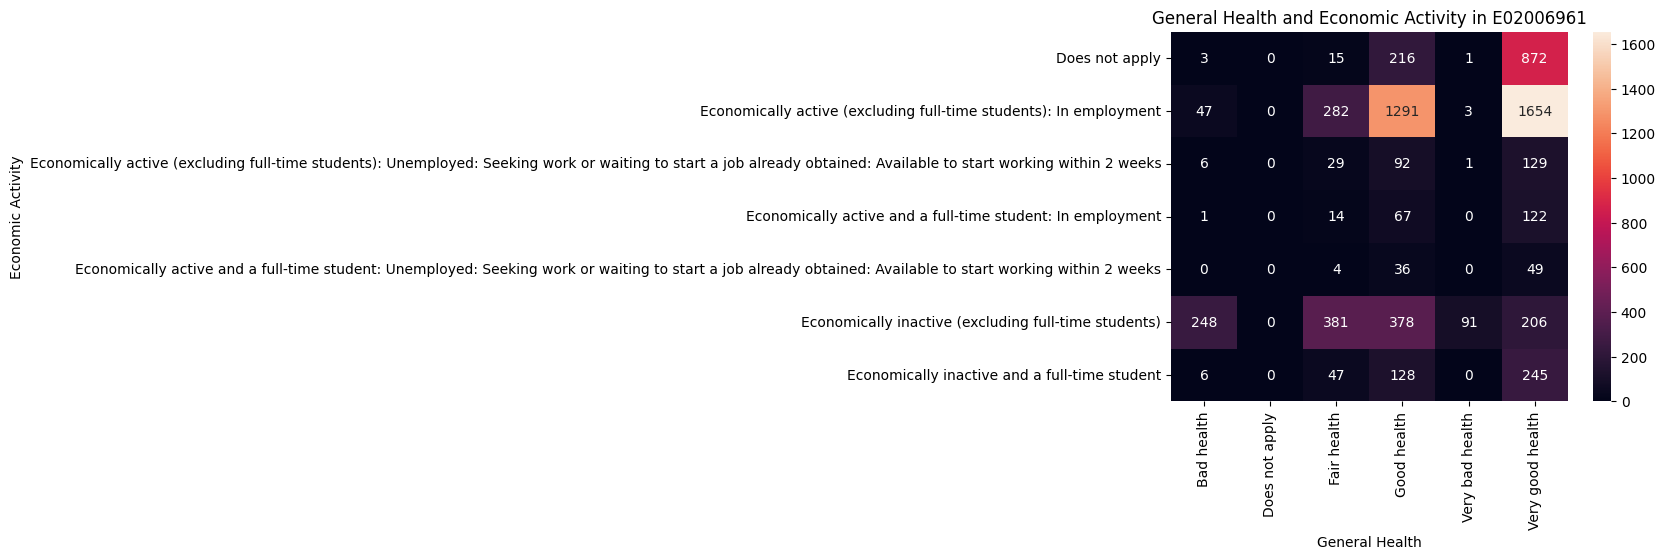

In [18]:
# Visualise the data as a heatmap using seaborn

sns.heatmap(
    df.loc[df["AREACD"] == "E02006961"].pivot(
        index="Economic Activity", columns="General Health", values="observation"
    ),
    annot=True,
    fmt="g",
    
).set_title("General Health and Economic Activity in E02006961")


### Thanks

Thanks to Jan Ahrens for suggesting convenience functions to explore APIs and visualise JSON in his [tutorial](https://blog.jan-ahrens.eu/2020/03/02/explore-apis.html), and the ONS CMD and Census API teams for a clear walkthrough to filter a dataset. Both were invaluable.